In [16]:
import numpy as np 
import re

# data processing
import pandas as pd

# data analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pd.read_csv('../Data/finaldataset.csv')
#dataset = pd.read_csv('D:\StudyMaterials\Sem2\DataScience\Assignment3\Lending_Club_ML\Data/finaldataset.csv')

#### Check the info, describe and head on the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157932 entries, 0 to 157931
Data columns (total 87 columns):
Unnamed: 0                    157932 non-null int64
dti                           157932 non-null float64
revol_bal                     157932 non-null float64
total_pymnt                   157932 non-null float64
loan_status                   157932 non-null object
loan_amnt                     157932 non-null float64
int_rate                      157932 non-null float64
sub_grade                     157932 non-null int64
annual_inc                    157932 non-null float64
acc_now_delinq                157932 non-null float64
delinq_2yrs                   157932 non-null float64
pub_rec                       157932 non-null float64
open_acc                      157932 non-null float64
inq_last_6mths                157932 non-null float64
revol_util                    157932 non-null float64
emp_length                    157932 non-null int64
addr_state_AL                 15

In [4]:
dataset.describe()

,Unnamed: 0,dti,revol_bal,total_pymnt,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
count,157932.000000,157932.000000,1.579320e+05,157932.000000,157932.000000,157932.000000,157932.000000,1.579320e+05,157932.00000,157932.000000,...,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000
mean,405984.128840,18.046043,1.973237e+04,8465.719783,14397.327489,12.436624,10.422302,8.766437e+04,0.00630,0.314559,...,0.013594,0.006484,0.002653,0.213440,0.552713,0.000063,0.000266,0.085803,0.361155,17.730147
std,259449.847646,8.678728,3.122720e+04,8446.508531,8783.155774,3.154233,4.382727,6.592817e+04,0.08842,0.857169,...,0.115800,0.080261,0.051439,0.409737,0.497215,0.007957,0.016305,0.280073,0.480337,7.263190
min,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,5.320000,1.000000,4.000000e+03,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210970
25%,162128.500000,11.300000,6.502000e+03,1872.710000,7500.000000,10.000000,7.000000,5.000000e+04,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.048193
50%,410700.000000,17.800000,1.247050e+04,5813.350000,12000.000000,12.690000,11.000000,7.450000e+04,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.056891
75%,618211.750000,24.370000,2.369600e+04,12312.440000,20000.000000,14.650000,14.000000,1.080000e+05,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,23.809524
max,886712.000000,69.350000,2.904836e+06,51236.151003,35000.000000,19.200000,18.000000,6.100000e+06,6.00000,26.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [5]:
dataset.head()

,Unnamed: 0,dti,revol_bal,total_pymnt,loan_status,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
0,0,27.65,13648.0,5861.071414,Fully Paid,5000.0,10.65,7,24000.0,0.0,...,0,0,0,0,0,0,0,0,1,20.833333
1,18,18.44,0.0,7164.499852,Fully Paid,6000.0,11.71,8,84000.0,0.0,...,0,0,0,0,1,0,0,0,0,7.142857
2,21,13.22,32135.0,14025.400000,Charged Off,21000.0,12.42,9,105000.0,0.0,...,0,0,0,0,0,0,0,0,1,20.000000
3,25,29.44,13707.0,15823.480000,Fully Paid,15000.0,9.91,6,92000.0,0.0,...,0,0,0,0,1,0,0,0,0,16.304348
4,33,11.93,2224.0,5714.592129,Fully Paid,5000.0,8.90,5,24044.0,0.0,...,0,0,0,0,0,0,0,0,1,20.795209


In [6]:
dataset.loan_status.value_counts()

Current                                                101329
Fully Paid                                              44101
Charged Off                                              7424
Late (31-120 days)                                       1649
Issued                                                   1621
In Grace Period                                           994
Late (16-30 days)                                         357
Does not meet the credit policy. Status:Fully Paid        232
Default                                                   164
Does not meet the credit policy. Status:Charged Off        61
Name: loan_status, dtype: int64

In [7]:
dataset.pop('Unnamed: 0')
# Removing loan status as that cannot be used as a feature in model
dataset.pop('loan_status')

0                 Fully Paid
1                 Fully Paid
2                Charged Off
3                 Fully Paid
4                 Fully Paid
5                 Fully Paid
6                 Fully Paid
7                Charged Off
8                 Fully Paid
9                 Fully Paid
10                Fully Paid
11                Fully Paid
12                Fully Paid
13                Fully Paid
14                Fully Paid
15                Fully Paid
16                Fully Paid
17                Fully Paid
18                Fully Paid
19               Charged Off
20                Fully Paid
21                Fully Paid
22                Fully Paid
23                Fully Paid
24                Fully Paid
25                Fully Paid
26                Fully Paid
27                   Current
28                Fully Paid
29                Fully Paid
                 ...        
157902               Current
157903               Current
157904               Current
157905        

In [8]:
Y = dataset.pop('int_rate').values
Y

array([10.65, 11.71, 12.42, ...,  9.49, 11.99, 11.99])

In [9]:
X = dataset.values
X

array([[2.76500000e+01, 1.36480000e+04, 5.86107141e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.08333333e+01],
       [1.84400000e+01, 0.00000000e+00, 7.16449985e+03, ...,
        0.00000000e+00, 0.00000000e+00, 7.14285714e+00],
       [1.32200000e+01, 3.21350000e+04, 1.40254000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+01],
       ...,
       [2.56300000e+01, 6.36100000e+03, 2.87473000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 1.87500000e+01],
       [2.36900000e+01, 2.11100000e+04, 4.76625000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.90476190e+01],
       [1.08300000e+01, 3.32660000e+04, 7.94376000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+01]])

## Create the train and test data

In [10]:
#This is Just an e.g. how to check for k-fold validations
#from sklearn.model_selection import KFold
# X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y1 = np.array([1, 2, 3, 4])
# kf = KFold(n_splits=3)
# kf.get_n_splits(X1)

# print(kf) 

# KFold(n_splits=2, random_state=None, shuffle=False)
# for train_index, test_index in kf.split(X1):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X1_train, X1_test = X1[train_index], X1[test_index]
#     y1_train, y1_test = y1[train_index], y1[test_index]

#### Defining a method that will TRAIN and EVALUATE algorithm and return the error metrics

In [19]:
def get_result(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    MAE = mean_absolute_error(Y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    MAPE_test = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    MAPE_train = np.mean(np.abs((Y_train - y_pred_train) / Y_train)) * 100
    return MAE,RMSE, MAPE_test,MAPE_train, y_pred, y_pred_train, model

#### Train Test Split conventional way

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [21]:
regressor = RandomForestRegressor()
mae,rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(regressor,X_train, X_test, Y_train, Y_test)
print("MAE on test: ",mae,"MAPE for Test: ", mape_test, "MAPE for Train: ", mape_train)

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE on test:  0.34173917264668874 MAPE for Test:  2.634967395223456 MAPE for Train:  1.015646998052047


No handles with labels found to put in legend.


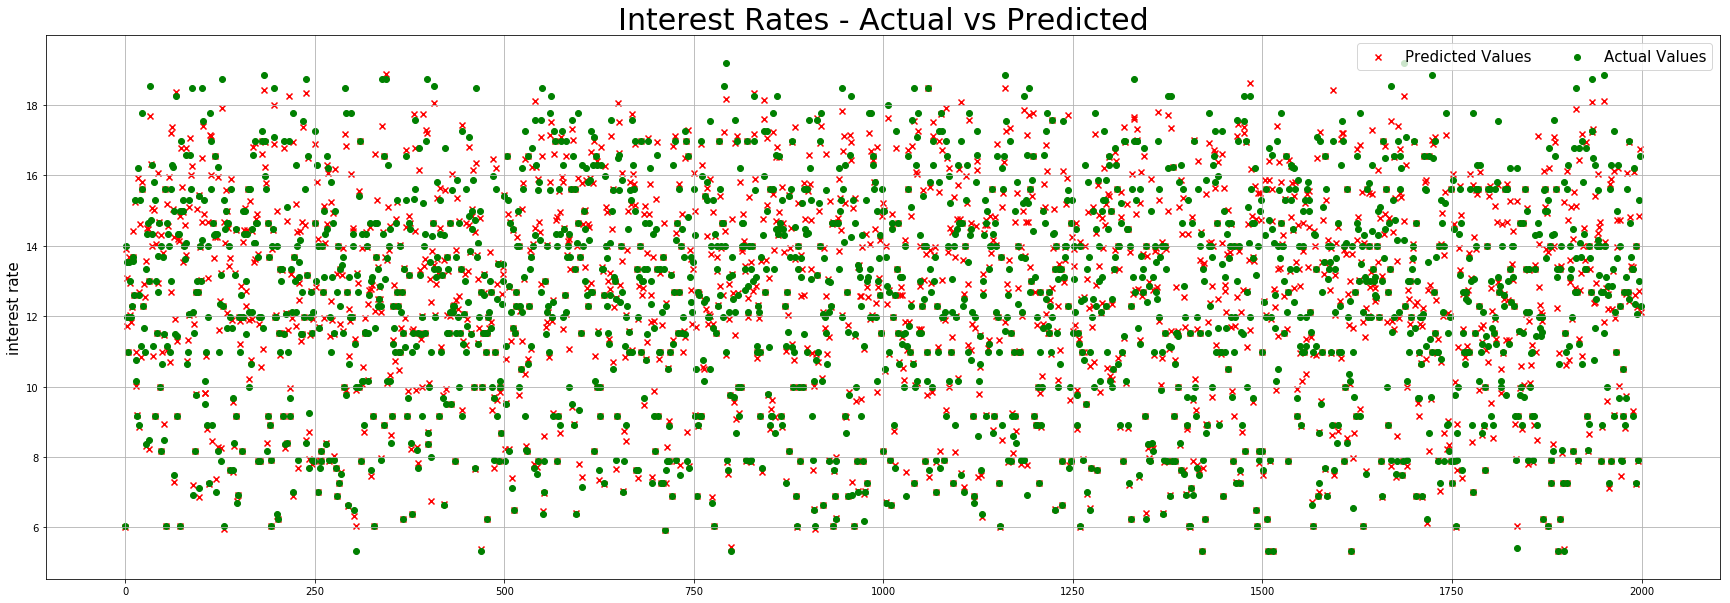

In [22]:
plt.figure(figsize=(30,10))
plt.legend()
plt.grid()
plt.title('Interest Rates - Actual vs Predicted',fontsize=30)
#plt.xlabel('loan profile',fontsize=15)
plt.ylabel('interest rate',fontsize=15)
a = plt.scatter(np.arange(2000),y_pred[:2000], color = 'red', marker='x')
b = plt.scatter(np.arange(2000),Y_test[:2000], color = 'green',marker='o')
plt.legend((a, b),
          ('Predicted Values', 'Actual Values'),
          scatterpoints=1,
          loc='upper right',
          ncol=3,
          fontsize=15)

#### This is the manual way to use the K-Fold cross validation and applying Random Forest

In [23]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 

MAE=[]
MAPE_TEST = []
MAPE_TRAIN = []
Y_test_array=[]
y_pred_array=[]
Y_train_ret_array = []
y_train_pred_array=[]
regressor = RandomForestRegressor() # No regularization

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    mae,rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(regressor,X_train, X_test, Y_train, Y_test)
    MAE.append(mae)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    Y_test_array.append(Y_test)
    y_pred_array.append(y_pred)
    Y_train_ret_array.append(Y_train)
    y_train_pred_array.append(y_train_pred)
print('------------------------------------------------------------------')    
print("MAPE on test data is :", MAPE_TEST)
print("MAPE on train data is :", MAPE_TRAIN)

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 31587  31588  31589 ... 157929 157930 157931] TEST: [    0     1     2 ... 31584 31585 31586]


C:\Users\navee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [31587 31588 31589 ... 63171 63172 63173]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [63174 63175 63176 ... 94757 94758 94759]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [ 94760  94761  94762 ... 126343 126344 126345]
TRAIN: [     0      1      2 ... 126343 126344 126345] TEST: [126346 126347 126348 ... 157929 157930 157931]
------------------------------------------------------------------
MAPE on test data is : [4.923589824353114, 4.571333291402345, 3.231026206274519, 2.2313446366261673, 5.093628427136849]
MAPE on train data is : [0.7259525479641318, 0.8977369655985479, 1.0020223213251251, 1.1874102775168547, 1.0528423192438081]


In [24]:
avg_MAPE_Test = sum(MAPE_TEST)/len(MAPE_TEST)
avg_MAPE_Test

4.010184477158599

In [25]:
avg_MAPE_Train = sum(MAPE_TRAIN)/len(MAPE_TRAIN)
avg_MAPE_Train

0.9731928863296936

In [27]:
avg_mae = np.mean(MAE)
avg_mae

0.508350573125754

In [31]:
regressor.base_estimator

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### This is the use of cross_val_score library by which we can get the accuracy score of our model

In [33]:
cross_val_score(regressor, X, Y)

array([0.90361202, 0.95267465, 0.90708472])

#### Feature importance 

In [34]:
feat_labels = dataset.columns[1:]
feat_labels

Index(['revol_bal', 'total_pymnt', 'loan_amnt', 'sub_grade', 'annual_inc',
       'acc_now_delinq', 'delinq_2yrs', 'pub_rec', 'open_acc',
       'inq_last_6mths', 'revol_util', 'emp_length', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS',
       'addr_state_MT', 'addr_state_NC', 'addr_state_ND', 'addr_state_NE',
       'addr_state_NH', 'addr_state_NJ', 'addr_state_NM', 'addr_state_NV',
       'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 'addr_state_OR',
       'addr_state_PA', 'addr_state_RI', 'addr_state_SC', 'addr_state_SD',
       'addr_state_TN', 'addr_state_TX', '

In [35]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), dataset.columns), 
             reverse=True))

Features sorted by their score:
[(0.9213, 'sub_grade'), (0.0423, 'total_pymnt'), (0.0089, 'loan_amnt'), (0.0033, 'revol_util'), (0.0033, 'dti'), (0.0032, 'revol_bal'), (0.0026, 'annual_inc'), (0.0022, 'loan_income_ratio'), (0.0018, 'open_acc'), (0.0012, 'emp_length'), (0.0011, 'term_ 60 months'), (0.0011, 'inq_last_6mths'), (0.0004, 'delinq_2yrs'), (0.0003, 'purpose_debt_consolidation'), (0.0003, 'pub_rec'), (0.0003, 'home_ownership_RENT'), (0.0003, 'addr_state_FL'), (0.0003, 'addr_state_CA'), (0.0002, 'purpose_other'), (0.0002, 'purpose_home_improvement'), (0.0002, 'purpose_credit_card'), (0.0002, 'home_ownership_MORTGAGE'), (0.0002, 'addr_state_TX'), (0.0002, 'addr_state_PA'), (0.0002, 'addr_state_OH'), (0.0002, 'addr_state_NY'), (0.0002, 'addr_state_NJ'), (0.0002, 'addr_state_MD'), (0.0002, 'addr_state_GA'), (0.0002, 'addr_state_AZ'), (0.0001, 'purpose_wedding'), (0.0001, 'purpose_vacation'), (0.0001, 'purpose_small_business'), (0.0001, 'purpose_moving'), (0.0001, 'purpose_medical')

Text(0.5,0,'Relative Importance')

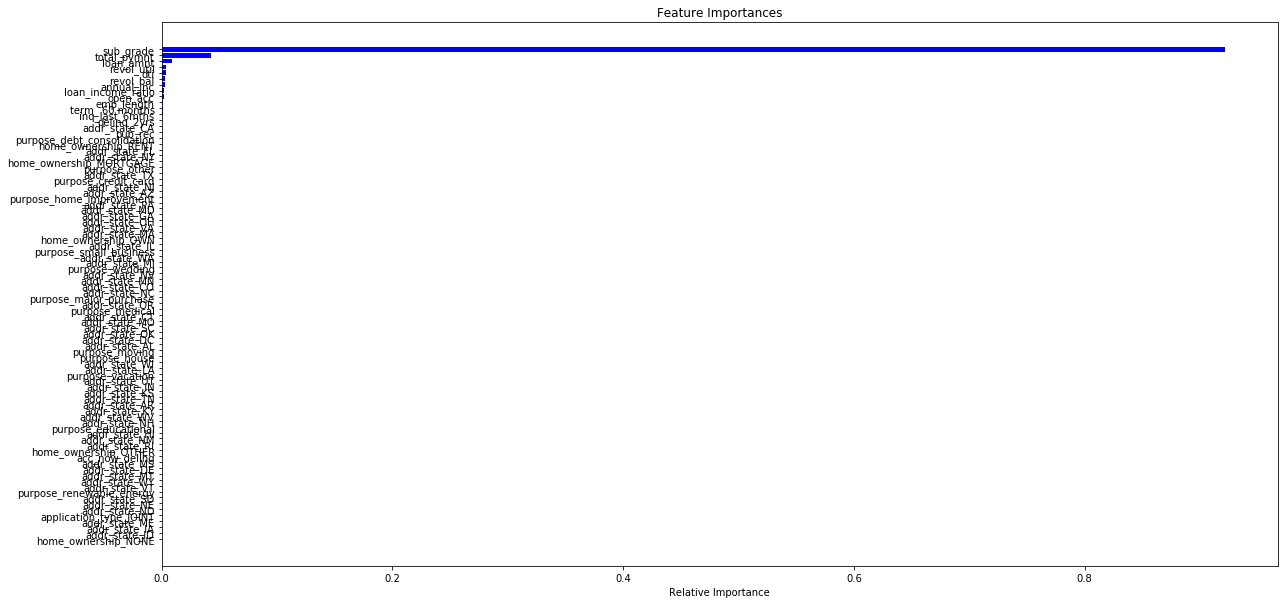

In [36]:
# This is plotting of the feature importance

features=dataset.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [42]:
dataset_imp_feature= dataset.drop(dataset.columns[dataset.columns.str.contains('sub_grade',case = False)],axis = 1)

In [45]:
dataset_imp_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157932 entries, 0 to 157931
Data columns (total 83 columns):
dti                           157932 non-null float64
revol_bal                     157932 non-null float64
total_pymnt                   157932 non-null float64
loan_amnt                     157932 non-null float64
annual_inc                    157932 non-null float64
acc_now_delinq                157932 non-null float64
delinq_2yrs                   157932 non-null float64
pub_rec                       157932 non-null float64
open_acc                      157932 non-null float64
inq_last_6mths                157932 non-null float64
revol_util                    157932 non-null float64
emp_length                    157932 non-null int64
addr_state_AL                 157932 non-null int64
addr_state_AR                 157932 non-null int64
addr_state_AZ                 157932 non-null int64
addr_state_CA                 157932 non-null int64
addr_state_CO                 15793

In [46]:
Y_feat = Y
X_feat = dataset_imp_feature.values
kf = KFold(n_splits=5)
kf.get_n_splits(X_feat)

print(kf) 

MAPE_TEST = []
MAPE_TRAIN = []
Y_test_array=[]
y_pred_array=[]
Y_train_ret_array = []
y_train_pred_array=[]
regressor = RandomForestRegressor() # No regularization

for train_index, test_index in kf.split(X_feat):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_feat[train_index], X_feat[test_index]
    Y_train, Y_test = Y_feat[train_index], Y_feat[test_index]
    rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(regressor,X_train, X_test, Y_train, Y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    Y_test_array.append(Y_test)
    y_pred_array.append(y_pred)
    Y_train_ret_array.append(Y_train)
    y_train_pred_array.append(y_train_pred)
print('------------------------------------------------------------------')    
print("MAPE on test data is :", MAPE_TEST)
print("MAPE on train data is :", MAPE_TRAIN)

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 31587  31588  31589 ... 157929 157930 157931] TEST: [    0     1     2 ... 31584 31585 31586]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [31587 31588 31589 ... 63171 63172 63173]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [63174 63175 63176 ... 94757 94758 94759]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [ 94760  94761  94762 ... 126343 126344 126345]
TRAIN: [     0      1      2 ... 126343 126344 126345] TEST: [126346 126347 126348 ... 157929 157930 157931]
------------------------------------------------------------------
MAPE on test data is : [18.976871728267007, 19.28761718027459, 16.881136622747242, 19.062400675087545, 20.619019272079015]
MAPE on train data is : [7.110229818347386, 7.090832661775871, 7.296285649077268, 7.140932019769229, 7.034041361825581]


In [52]:
importances = model.feature_importances_
indices = np.argsort(importances)

print(importances)
print(indices)

[7.08747310e-02 9.92011873e-02 1.03342975e-01 5.95701348e-02
 8.14488969e-02 7.77434194e-04 1.84974244e-02 2.09645441e-02
 4.83803270e-02 6.08223323e-02 1.44645557e-01 2.69356371e-02
 1.24674306e-03 8.63921445e-04 1.95113995e-03 6.16597451e-03
 1.81911484e-03 1.77995289e-03 5.07887897e-04 3.78219095e-04
 4.14328487e-03 2.74316040e-03 6.14203804e-04 0.00000000e+00
 0.00000000e+00 3.04545444e-03 1.27998374e-03 9.41287259e-04
 9.05849923e-04 1.04476992e-03 2.38222938e-03 2.27351396e-03
 3.33348505e-05 2.29705759e-03 1.77861715e-03 1.58214671e-03
 3.36566666e-04 3.41622975e-04 2.11940612e-03 7.78340253e-05
 1.21243931e-04 4.24837307e-04 3.01349782e-03 5.92172999e-04
 1.60620758e-03 4.72508038e-03 2.36618694e-03 9.79711804e-04
 1.21283157e-03 2.61317334e-03 5.17156348e-04 1.20126771e-03
 1.91601466e-04 1.09422394e-03 4.62872783e-03 6.39647523e-04
 2.58075466e-03 1.89712393e-04 2.08373016e-03 1.07559575e-03
 4.46890507e-04 3.46778166e-04 3.53941472e-05 1.78130908e-02
 6.06525637e-03 5.409492

Text(0.5,0,'Relative Importance')

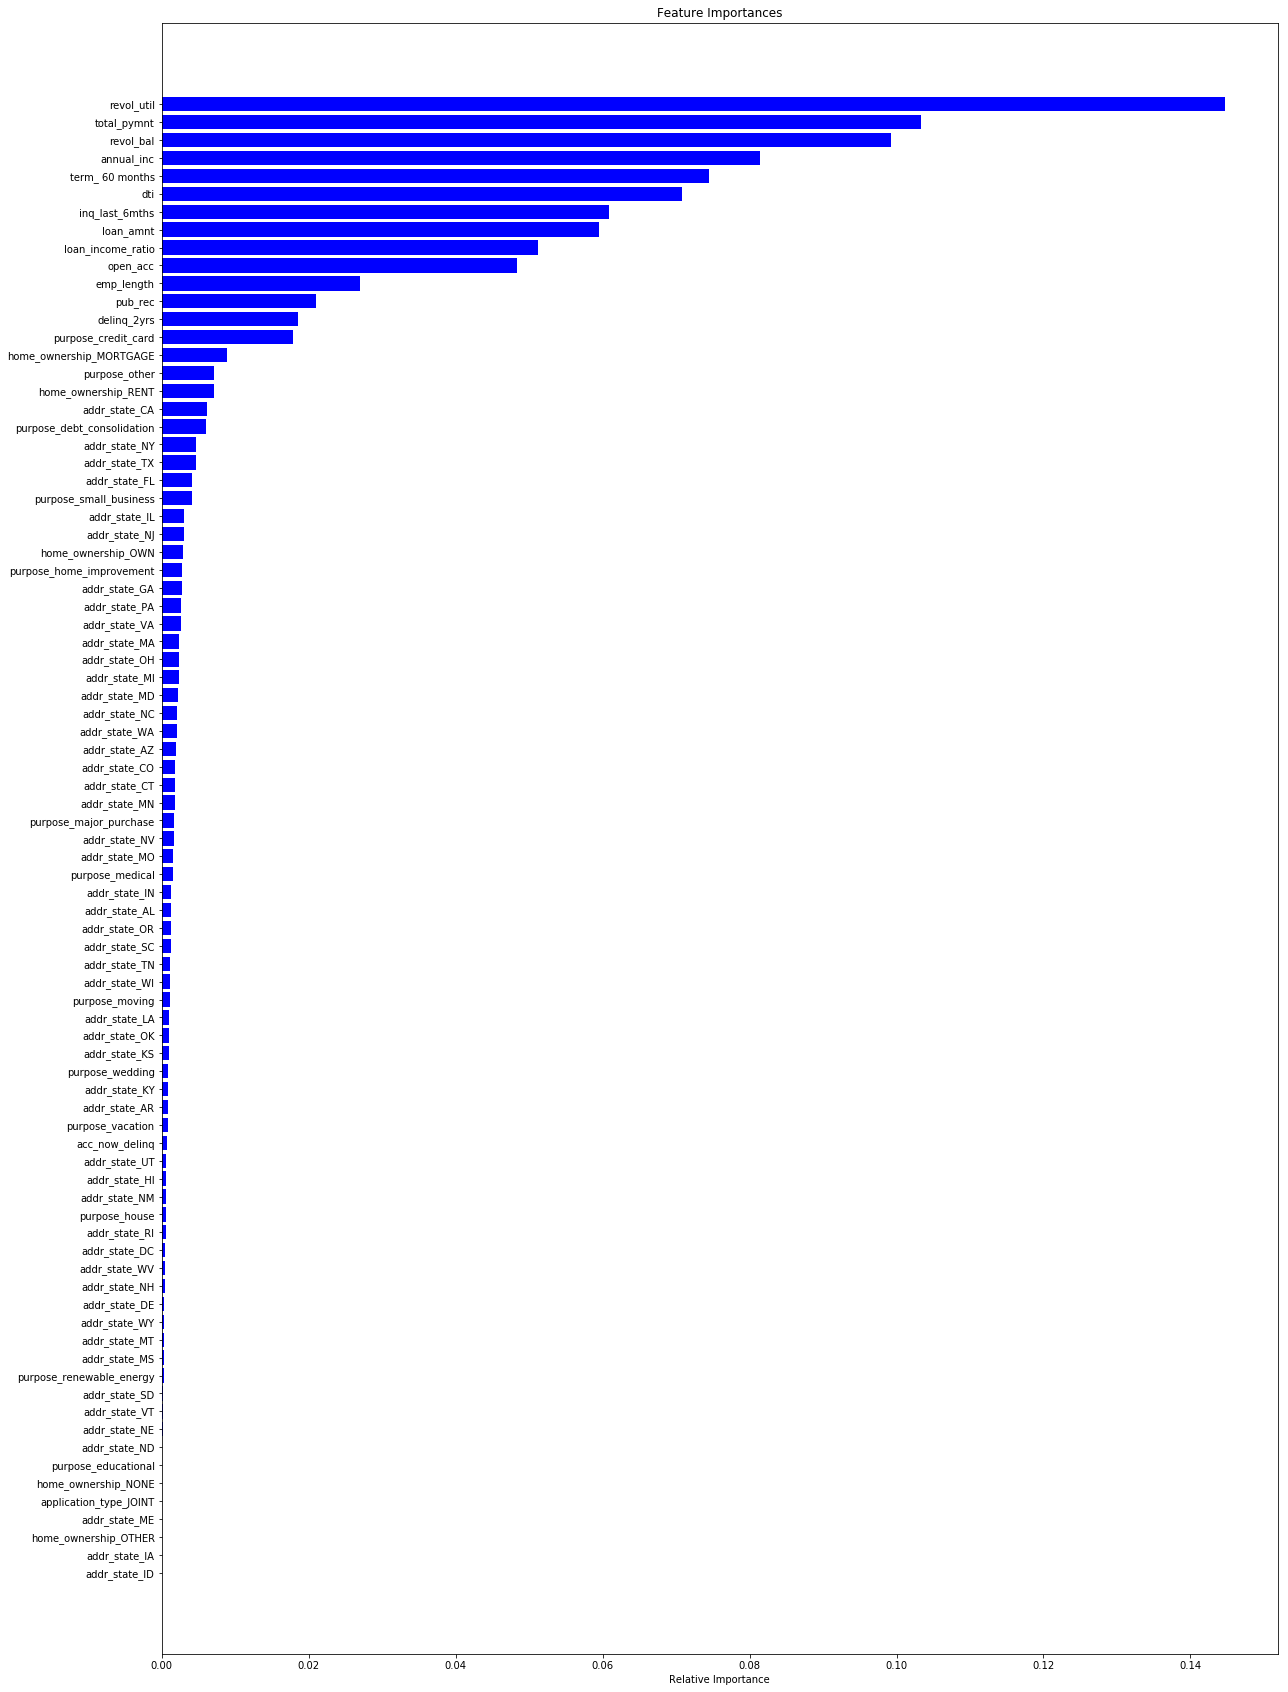

In [49]:
# This is plotting of the feature importance

features=dataset_imp_feature.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Taking the top 

In [40]:
# As address sate is having very less feature importance as we can see from the above plotted graphs, so we are dropping them 
# to check if it improves model
#dataset_imp_feature= dataset.drop(dataset.columns[dataset.columns.str.contains('addr_state_',case = False)],axis = 1)

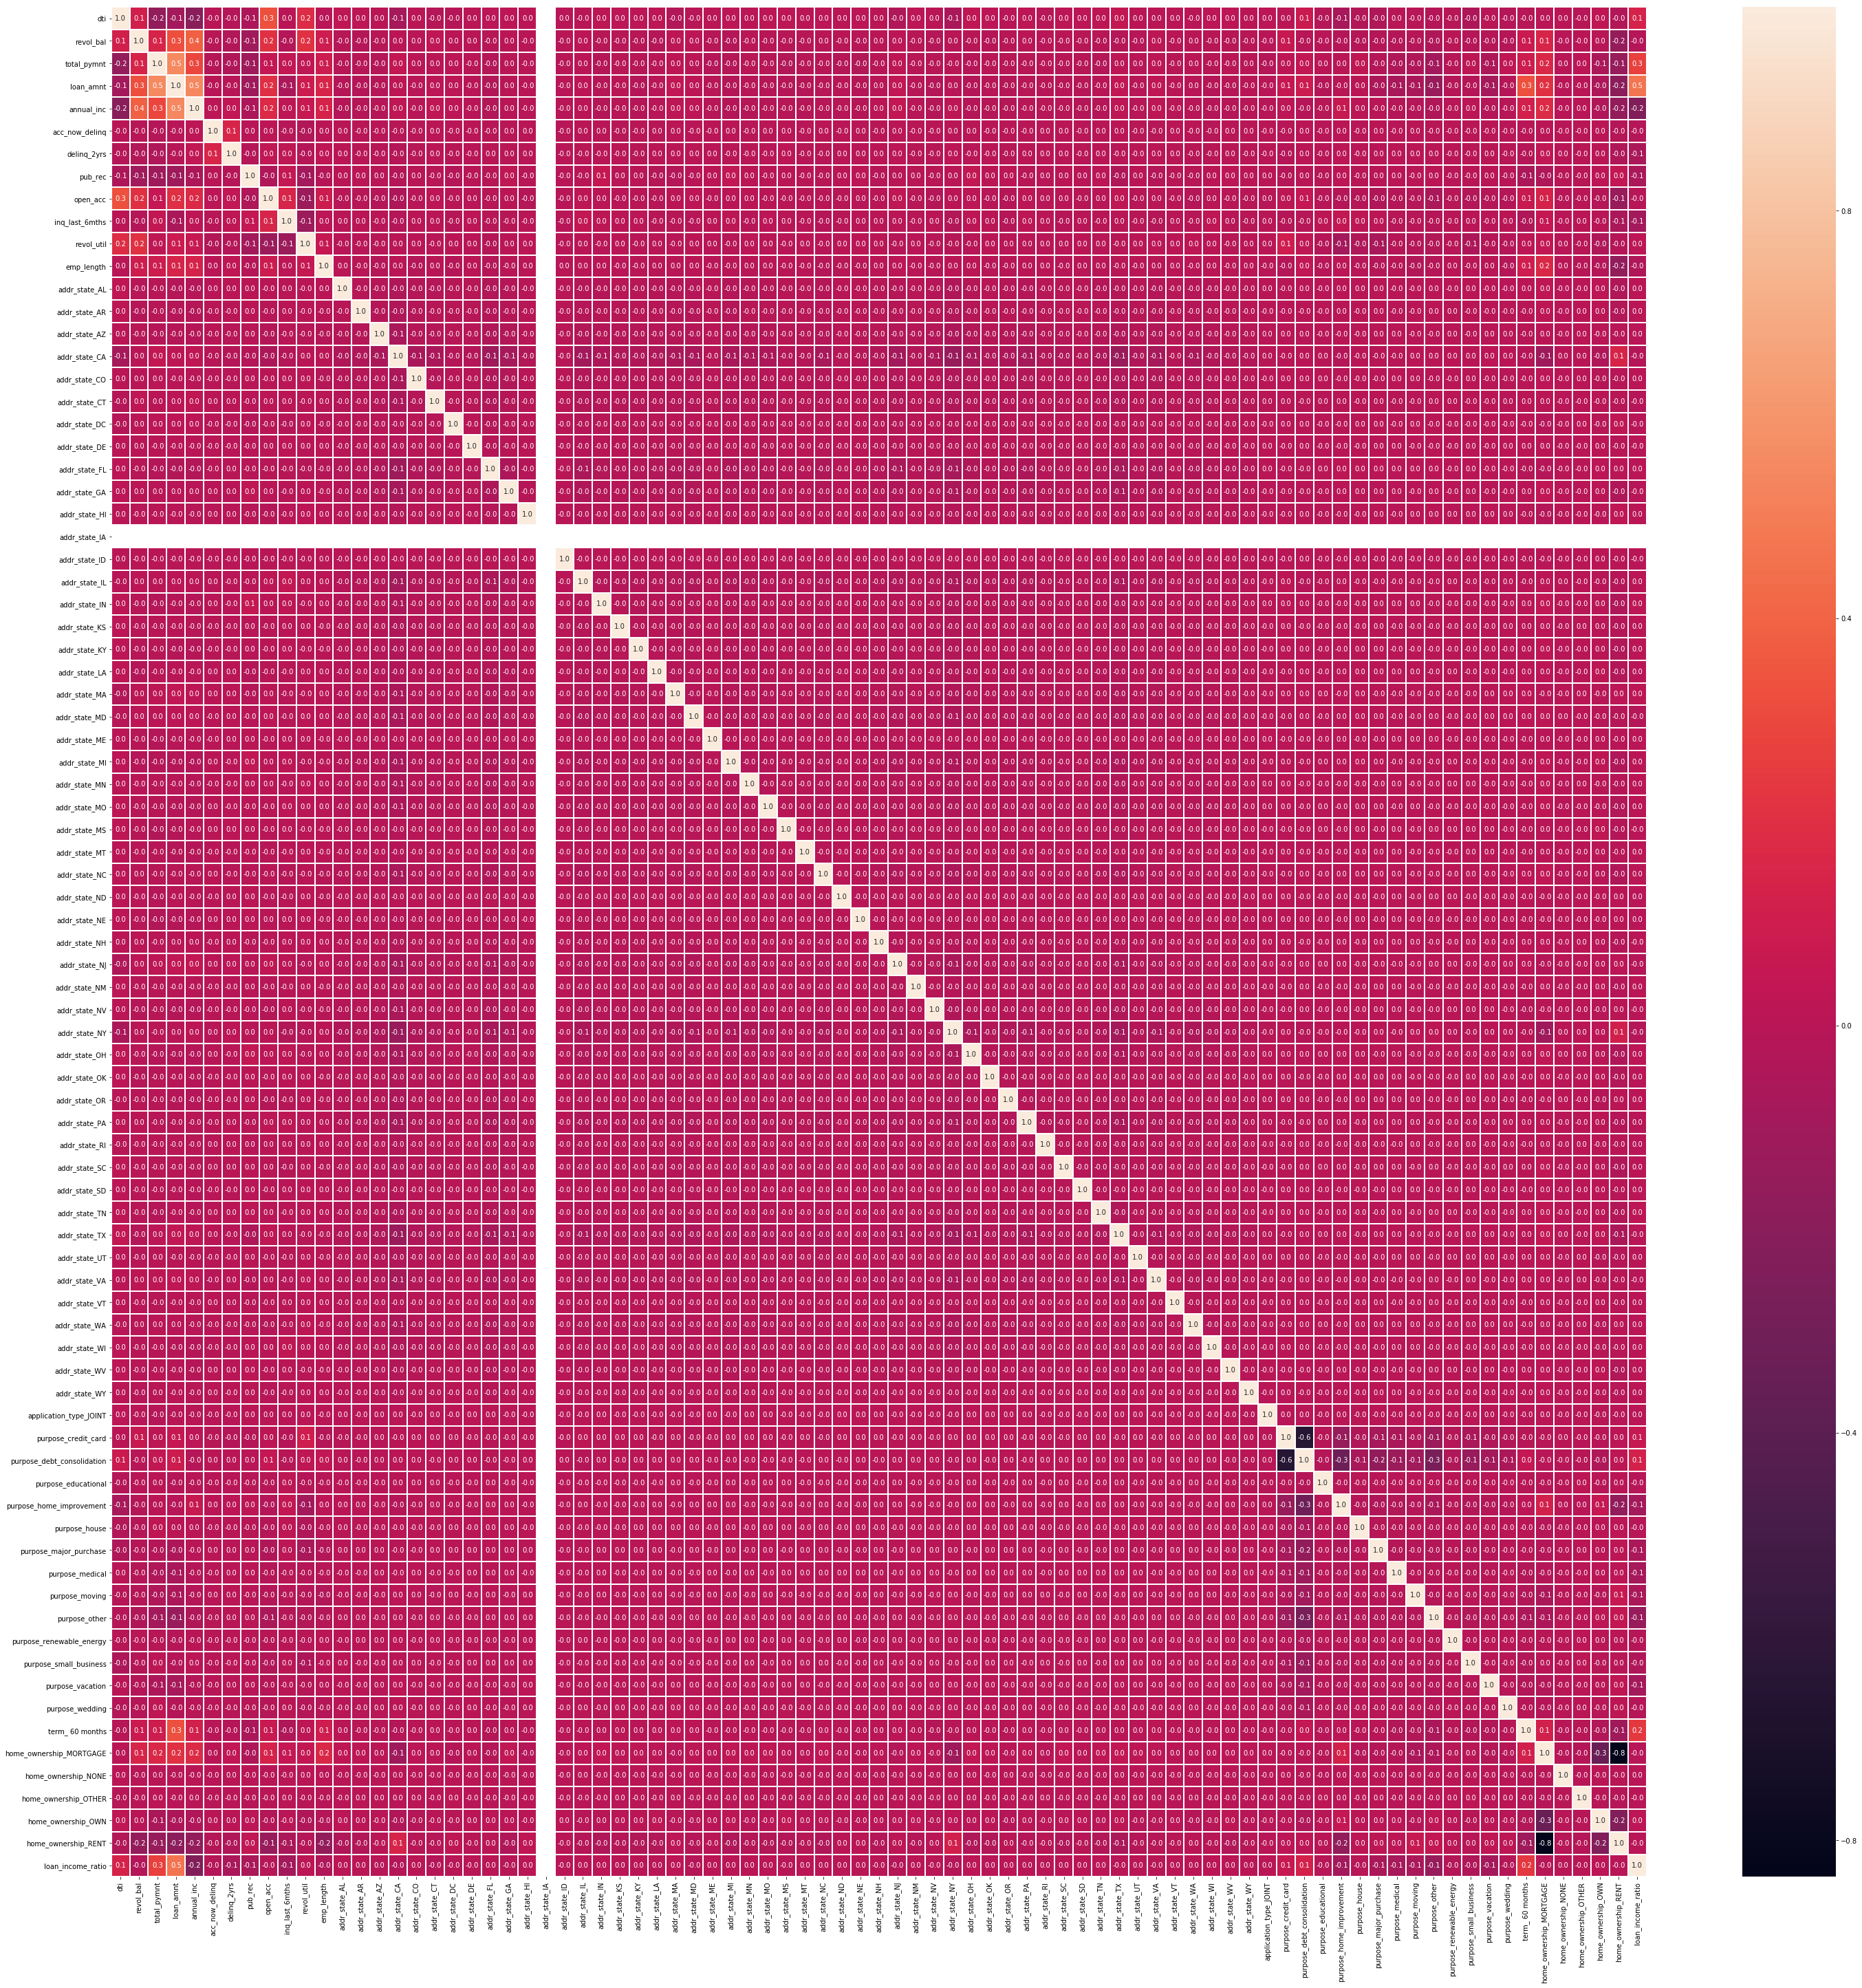

In [51]:
#Checking correlation of loan_amount and income

f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(dataset_imp_feature.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

### Hyper Parameter tuning

### We will tune the max_depth and nos of estimators 
##### RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=None,
#####           min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
#####           n_estimators=100, n_jobs=1, oob_score=True, random_state=42, verbose=0, warm_start=False)

In [33]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
regressor = RandomForestRegressor() 
param_grid = {"n_estimators": [10,15,20,25,30],
             "max_depth": [4,5,6,7,8,9],
             "bootstrap": [True, False]}

# run grid search
grid_search = GridSearchCV(regressor, scoring="neg_mean_absolute_error", param_grid=param_grid, cv=5)
grid_search.fit(X, Y)

print(grid_search.score)


KFold(n_splits=5, random_state=None, shuffle=False)
<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 15, 20, 25, 30], 'max_depth': [4, 5, 6, 7, 8, 9], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)>


In [34]:
grid_search.best_score_

-0.49287516967267103

In [35]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 9, 'n_estimators': 30}

In [ ]:
grid_search.

In [61]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 



max_depth_list = [3,4,5,6,7,8]

for depth in max_depth_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    regressor = RandomForestRegressor(max_depth= depth) 

    for train_index, test_index in kf.split(X_feat):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_feat[train_index], X_feat[test_index]
        Y_train, Y_test = Y_feat[train_index], Y_feat[test_index]
        rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(regressor,X_train, X_test, Y_train, Y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
#     Y_test_array.append(Y_test)
#     y_pred_array.append(y_pred)
#     Y_train_ret_array.append(Y_train)
#     y_train_pred_array.append(y_train_pred)
    print("depth = ",depth, MAPE_TEST)
# print("MAPE on test data is :", MAPE_TEST)
# print("MAPE on train data is :", MAPE_TRAIN)


KFold(n_splits=5, random_state=None, shuffle=False)
depth =  3 [24.42699936709539]
depth =  4 [23.454076824920254]
depth =  5 [23.017305225216305]
depth =  6 [22.524245706577858]
depth =  7 [21.942297059441877]
depth =  8 [21.537372195506645]


##### Taking the depth to be 8 as this is producing least MAPE, we will modulate with nos of estimators

In [62]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_feat)

print(kf) 


n_estimator_list = [10,15,20,25,30]

for est in n_estimator_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]   
    regressor = RandomForestRegressor(max_depth= 8, n_estimators= est) 

    for train_index, test_index in kf.split(X_feat):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_feat[train_index], X_feat[test_index]
        Y_train, Y_test = Y_feat[train_index], Y_feat[test_index]
        rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(regressor,X_train, X_test, Y_train, Y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    print("estimator = ",est,"MAPE :", MAPE_TEST)

KFold(n_splits=5, random_state=None, shuffle=False)
estimator =  10 MAPE : [21.452824581410688]
estimator =  15 MAPE : [21.526535504368468]
estimator =  20 MAPE : [21.514646754678054]
estimator =  25 MAPE : [21.500492790619806]
estimator =  30 MAPE : [21.48836009829404]


#### Plotting the actual and the predicted interest rate

In [63]:
# To plot we have to take one set of test and predicted interest rate. 
# As the MAPE is averaged and we cannot average the test and predicted value, so we will take that set which has the MAPE most 
# close to the average MAPE i.e the set that produced 4.5 which is most close to 4.00 i.e 2nd index in the array

df = pd.DataFrame({'Actual': Y_test_array[1], 'Predicted': y_pred_array[1]})


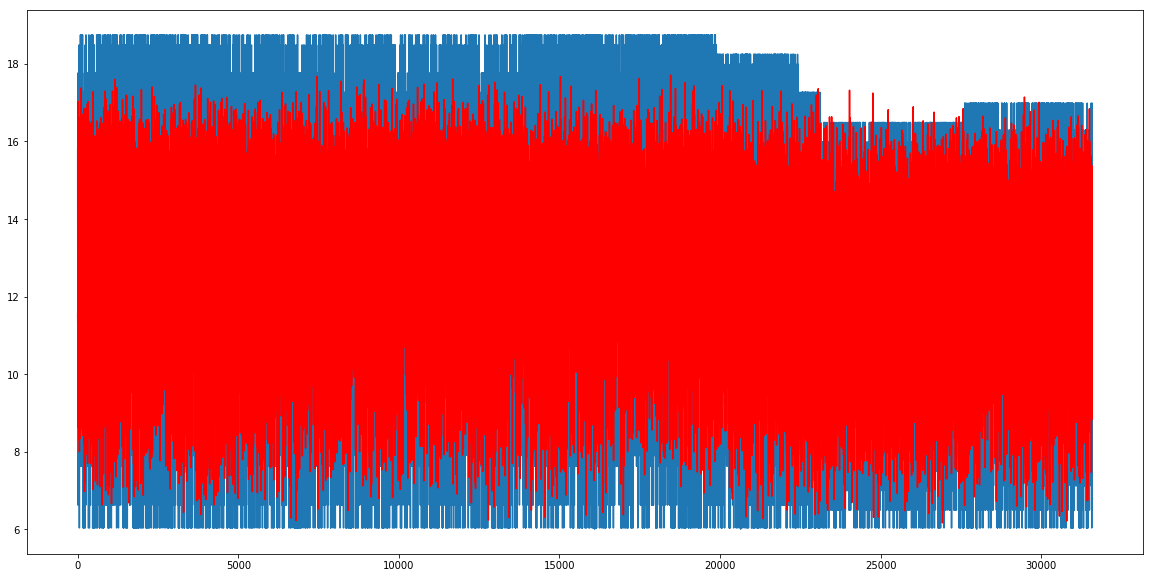

In [64]:
plt.figure(figsize=(20,10))
X= list(range(0, df.shape[0]))
# pred = sns.scatterplot(x=X, y="Predicted", data=df)
# true = sns.scatterplot(x=X, y="Actual", data=df, markers=)
plt.plot(X, df['Actual'])
plt.plot(X, df['Predicted'], color='red')

## Random Forest is giving the best MAPE out of other models, so we will give this model to our client
- we are building test cases by randomly selecting few loan profiles from our lending set to compare the prediction generated by our model with the actual values

In [38]:
usecases = dataset.sample(n=10,random_state=1)
usecases_int_rates = Y[usecases.index]
usecases_int_rates

array([ 9.17, 10.99, 11.22,  9.67,  9.67, 11.99, 10.99, 12.29, 16.99,
       11.53])

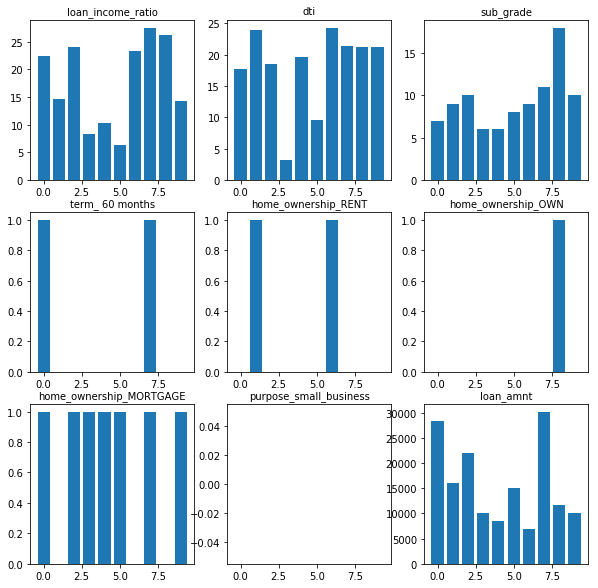

In [43]:
plt.figure(figsize=(10,10))

a = plt.bar(np.arange(10),usecases['loan_income_ratio'], color = 'red')
plt.subplot(331)
plt.bar(np.arange(10), usecases['loan_income_ratio'])
plt.title('loan_income_ratio',fontsize=10)
plt.subplot(332)
plt.bar(np.arange(10), usecases['dti'])
plt.title('dti',fontsize=10)
plt.subplot(333)
plt.bar(np.arange(10), usecases['sub_grade'])
plt.title('sub_grade',fontsize=10)
plt.subplot(334)
plt.bar(np.arange(10), usecases['term_ 60 months'])
plt.title('term_ 60 months',fontsize=10)
plt.subplot(335)
plt.bar(np.arange(10), usecases['home_ownership_RENT'])
plt.title('home_ownership_RENT',fontsize=10)
plt.subplot(336)
plt.bar(np.arange(10), usecases['home_ownership_OWN'])
plt.title('home_ownership_OWN',fontsize=10)
plt.subplot(337)
plt.bar(np.arange(10), usecases['home_ownership_MORTGAGE'])
plt.title('home_ownership_MORTGAGE',fontsize=10)
plt.subplot(338)
plt.bar(np.arange(10), usecases['purpose_vacation'])
plt.title('purpose_small_business',fontsize=10)
plt.subplot(339)
plt.bar(np.arange(10), usecases['loan_amnt'])
plt.title('loan_amnt',fontsize=10)
plt.show()



In [44]:
bestmodel = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
predicted_int_rates = grid_search.predict(usecases)

In [48]:
predicted_int_rates

array([ 9.35519413, 11.04843053, 11.3146194 ,  9.92607241,  9.82169757,
       11.70838972, 11.02021106, 12.36859466, 17.0313866 , 11.58994569])

In [49]:
usecases_int_rates

array([ 9.17, 10.99, 11.22,  9.67,  9.67, 11.99, 10.99, 12.29, 16.99,
       11.53])

No handles with labels found to put in legend.


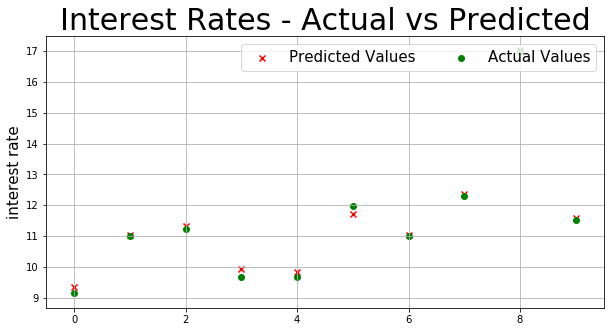

In [52]:
plt.figure(figsize=(10,5))
plt.legend()
plt.grid()
plt.title('Interest Rates - Actual vs Predicted',fontsize=30)
#plt.xlabel('loan profile',fontsize=15)
plt.ylabel('interest rate',fontsize=15)
a = plt.scatter(np.arange(10),predicted_int_rates, color = 'red', marker='x')
b = plt.scatter(np.arange(10),usecases_int_rates, color = 'green',marker='o')
plt.legend((a, b),
          ('Predicted Values', 'Actual Values'),
          scatterpoints=1,
          loc='upper right',
          ncol=3,
          fontsize=15)

In [84]:
mape_usecase = np.mean(np.abs(predicted_int_rates-usecases_int_rates)/usecases_int_rates)*100
mape_usecase

1.163801219030937

In [81]:
profiles=[]
for i in range(1,11):
    profiles.append("Profile "+str(i))
profiles

['Profile 1',
 'Profile 2',
 'Profile 3',
 'Profile 4',
 'Profile 5',
 'Profile 6',
 'Profile 7',
 'Profile 8',
 'Profile 9',
 'Profile 10']

In [82]:
usecasedf = pd.DataFrame()
usecasedf['Profile'] = profiles
usecasedf['Actual interest rate']=usecases_int_rates.tolist()
usecasedf['Predicated interest rate']= predicted_int_rates.tolist()

In [83]:
usecasedf

,Profile,Actual interest rate,Predicated interest rate
0,Profile 1,9.17,9.355194
1,Profile 2,10.99,11.048431
2,Profile 3,11.22,11.314619
3,Profile 4,9.67,9.926072
4,Profile 5,9.67,9.821698
5,Profile 6,11.99,11.708390
6,Profile 7,10.99,11.020211
7,Profile 8,12.29,12.368595
8,Profile 9,16.99,17.031387
9,Profile 10,11.53,11.589946
